In [1]:
%run -i "download_dataset.py"

data set loaded


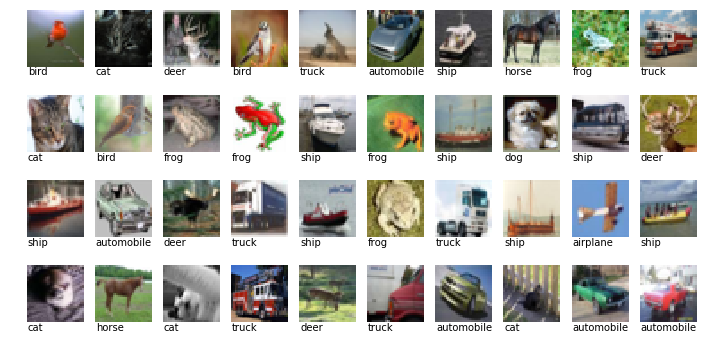

In [2]:
from classifiers.data_set_deserializer import get_data_set, visualize
data_set = get_data_set()
X = data_set.training_pictures
Y = data_set.get_training_labels_text()
visualize(X, Y, (4, 10))

/opt/conda/lib/python2.7/site-packages/skimage/feature/_hog.py:116: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


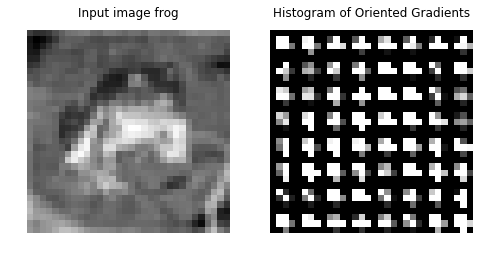

/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_train_pictures.npy generated
/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_test_pictures.npy generated
Number of features: 1568
Accuracy = 53.5% (5350/10000) (classification)
('lin svm model', 'saved')
Generated model details:
('acc ', 53.5, 'mean_square ', 8.5561, ' correlation', 0.24044902251280342)


In [3]:
from classifiers.hog_features import HogFeaturesDataSet
parameters = {
    'orientations': 8,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (2, 2)
}
hog_features = HogFeaturesDataSet(parameters).get_hog_features(overwrite=False,visualize=True)

Linear classifier arguments

-s type : set type of solver (default 1)
	 0 -- L2-regularized logistic regression (primal)
	 1 -- L2-regularized L2-loss support vector classification (dual)
	 2 -- L2-regularized L2-loss support vector classification (primal)
	 3 -- L2-regularized L1-loss support vector classification (dual)
	 4 -- multi-class support vector classification by Crammer and Singer
	 5 -- L1-regularized L2-loss support vector classification
	 6 -- L1-regularized logistic regression
	 7 -- L2-regularized logistic regression (dual)
	11 -- L2-regularized L2-loss epsilon support vector regression (primal)
	12 -- L2-regularized L2-loss epsilon support vector regression (dual)
	13 -- L2-regularized L1-loss epsilon support vector regression (dual)
-c cost : set the parameter C (default 1)
-p epsilon : set the epsilon in loss function of epsilon-SVR (default 0.1)
-e epsilon : set tolerance of termination criterion
	-s 0 and 2
		|f'(w)|_2 <= eps*min(pos,neg)/l*|f'(w0)|_2,
		where f is the primal function and pos/neg are # of
		positive/negative data (default 0.01)
	-s 11
		|f'(w)|_2 <= eps*|f'(w0)|_2 (default 0.001) 
	-s 1, 3, 4 and 7
		Dual maximal violation <= eps; similar to libsvm (default 0.1)
	-s 5 and 6
		|f'(w)|_inf <= eps*min(pos,neg)/l*|f'(w0)|_inf,
		where f is the primal function (default 0.01)
	-s 12 and 13\n"
		|f'(alpha)|_1 <= eps |f'(alpha0)|,
		where f is the dual function (default 0.1)
-B bias : if bias >= 0, instance x becomes [x; bias]; if < 0, no bias term added (default -1)
-wi weight: weights adjust the parameter C of different classes (see README for details)
-v n: n-fold cross validation mode

In [ ]:
from classifiers.svm_wrappers import LinearClassifierGenerator
linear_classifier = LinearClassifierGenerator()

In [ ]:
# -s 2 for optimization
linear_classifier.classifier_generator(hog_features, params="-s 2 -c 4 -B 1", save=True)

In [4]:
from classifiers.vgg16_features import Vgg16FeatureDataSet
from classifiers.t_sne import visualize_features_pypl_tsne_fast

vgg16_features = Vgg16FeatureDataSet().get_features(overwrite=False)
visualize_features_pypl_tsne_fast(vgg16_features, 10000)

Using TensorFlow backend.


Loading features
Test features:
Train features:
Loading features


KeyboardInterrupt: 

In [ ]:
linear_classifier.classifier_generator(vgg16_features, params="-s 2 -c 4 -B 1", save=True)

Kernel classifier arguments

-s svm_type : set type of SVM (default 0)
	0 -- C-SVC		(multi-class classification)
	1 -- nu-SVC		(multi-class classification)
	2 -- one-class SVM	
	3 -- epsilon-SVR	(regression)
	4 -- nu-SVR		(regression)
-t kernel_type : set type of kernel function (default 2)
	0 -- linear: u'*v
	1 -- polynomial: (gamma*u'*v + coef0)^degree
	2 -- radial basis function: exp(-gamma*|u-v|^2)
	3 -- sigmoid: tanh(gamma*u'*v + coef0)
	4 -- precomputed kernel (kernel values in training_set_file)
-d degree : set degree in kernel function (default 3)
-g gamma : set gamma in kernel function (default 1/num_features)
-r coef0 : set coef0 in kernel function (default 0)
-c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)
-n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR (default 0.5)
-p epsilon : set the epsilon in loss function of epsilon-SVR (default 0.1)
-m cachesize : set cache memory size in MB (default 100)
-e epsilon : set tolerance of termination criterion (default 0.001)
-h shrinking : whether to use the shrinking heuristics, 0 or 1 (default 1)
-b probability_estimates : whether to train a SVC or SVR model for probability estimates, 0 or 1 (default 0)
-wi weight : set the parameter C of class i to weight*C, for C-SVC (default 1)
-v n: n-fold cross validation mode

from classifiers.svm_wrappers import KernelClassifierGenerator
kernel_classifier = KernelClassifierGenerator()

In [6]:
#-h heuristic optimization. other options -t 0/4 -c 4 -b 1
kernel_classifier.classifier_generator(vgg16_features, params="-h 0", save=True)

NameError: name 'kernel_classifier' is not defined

In [ ]:
kernel_classifier.classifier_generator(vgg16_features, params="-h 0 -t 0 -c 4 -b 1", save=True)

In [ ]:
kernel_classifier.classifier_generator(vgg16_features, params="-h 0 -t 4 -c 4 -b 1", save=True)